In [38]:
! pip install lalsuite

! pip install -q pycbc
! pip install -q 'gwpy==3.0.8'

In [39]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [40]:
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf

--2024-02-25 13:43:10--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/workshop3/challenge/challenge2.gwf [following]
--2024-02-25 13:43:11--  https://gwosc.org/s/workshop3/challenge/challenge2.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.73
Connecting to gwosc.org (gwosc.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf.14’

challenge2.gwf.14   100%[===================>]   3.84M  2.21MB/s    in 1.7s    

2024-02-25 13:43:13 (2.21 MB/s) - ‘challenge2.gwf.14’ saved [4025842/4025842]



In [16]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

In [20]:
from gwpy.timeseries import TimeSeries
RDT = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")
print(RDT)

TimeSeries([ 8.75332715e-22,  1.27597248e-22,  1.88838802e-22,
            ..., -1.91886478e-23, -2.10989354e-22,
             2.30287965e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE2,
           channel: None)


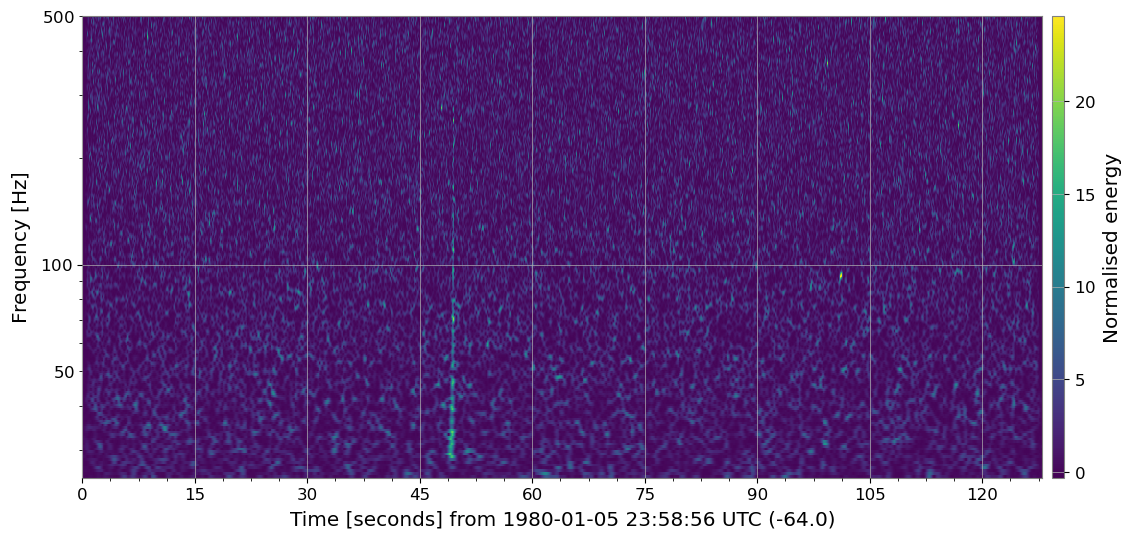

In [42]:
#--Use OUTSEG for small time range
ASN = RDT.q_transform(frange=(25,500) , qrange=(70,120))
plot = ASN.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label = "Normalised energy")

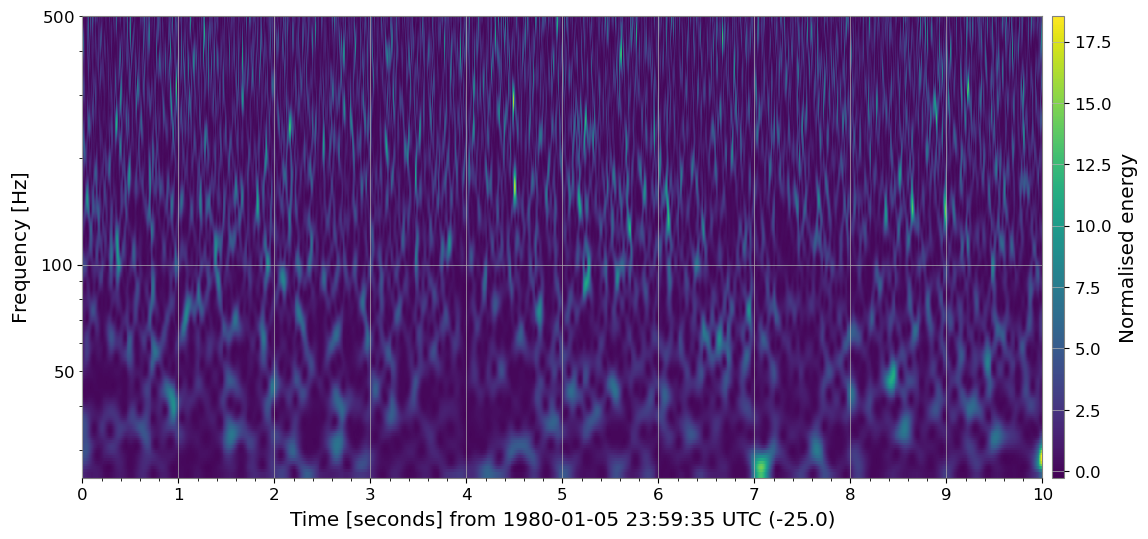

In [43]:
#--Use OUTSEG for smalll range time
ASN = RDT.q_transform(frange=(25,500) , qrange=(15,20), outseg=(40-65,50-65))
plot = ASN.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label = "Normalised energy")

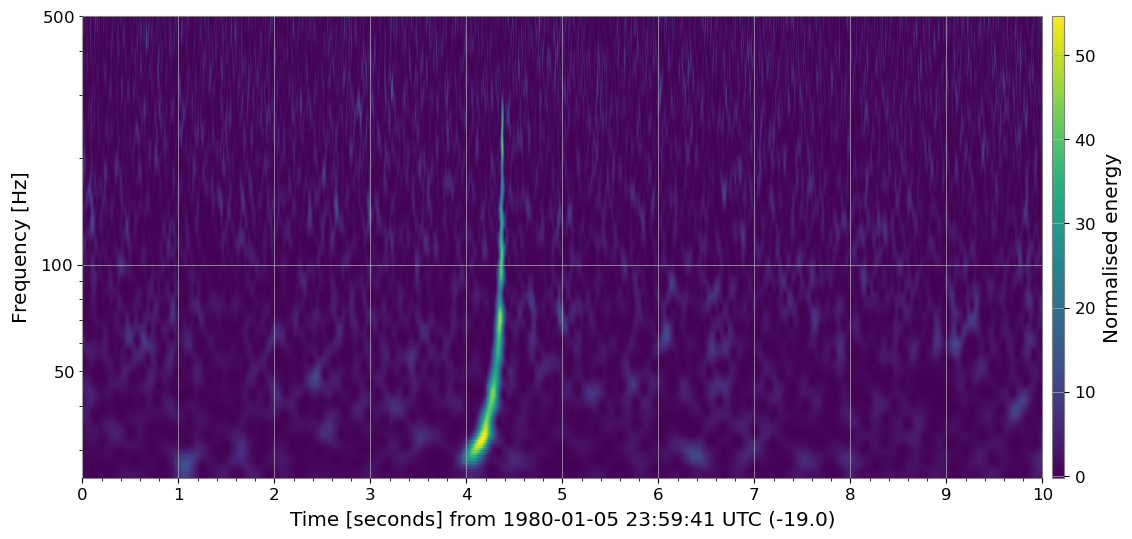

In [44]:
#--Use OUTSEG for smalll range time
ASN = RDT.q_transform(frange=(25,500) , qrange=(17,27), outseg=(45-64,55-64))
plot = ASN.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label = "Normalised energy")

In [45]:
%matplotlib inline
from pycbc.waveform import get_td_waveform
import pylab

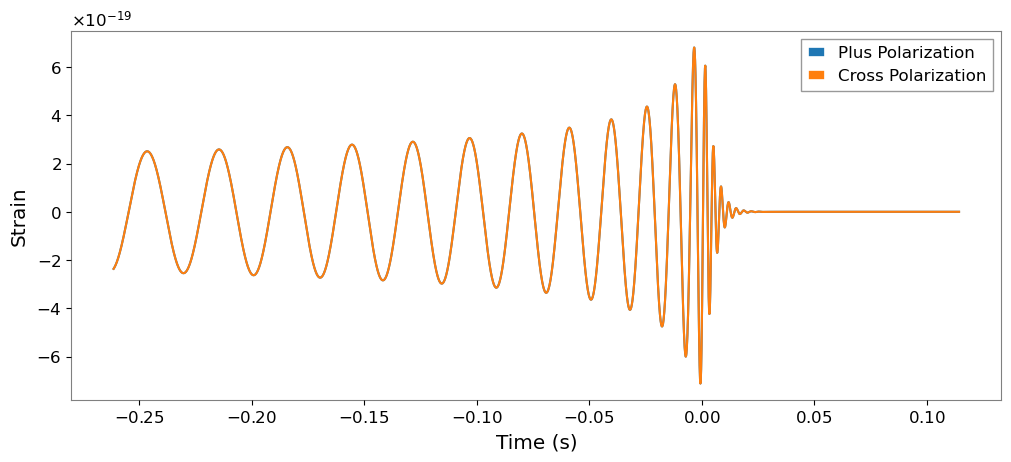

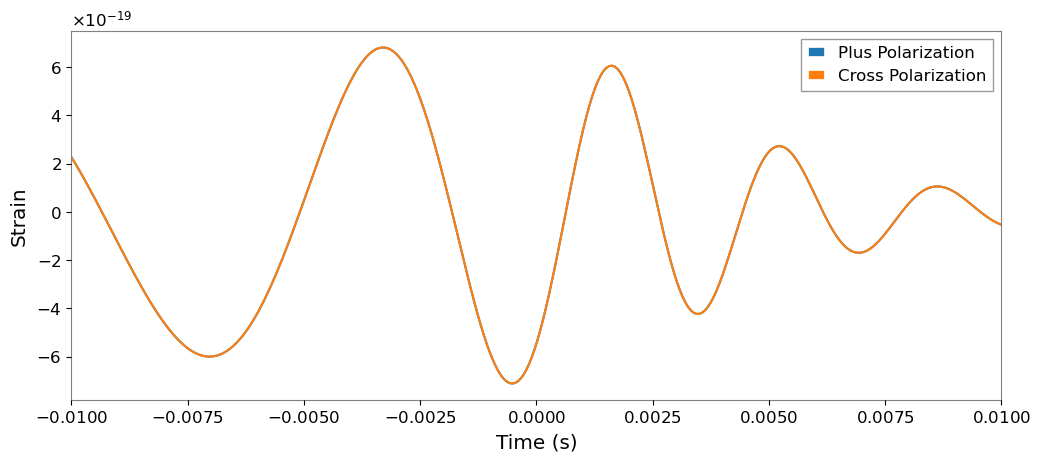

In [46]:
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=1.0/16384,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hp, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()


#zoomin code
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hp, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

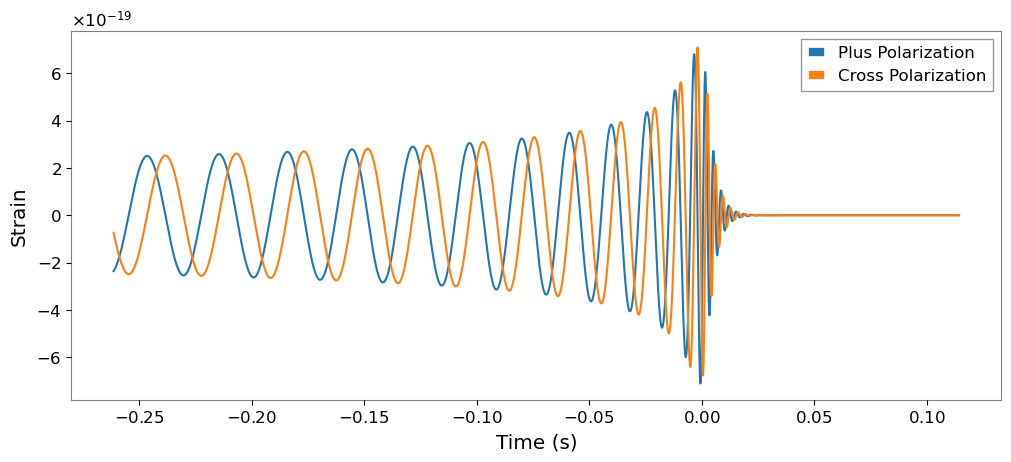

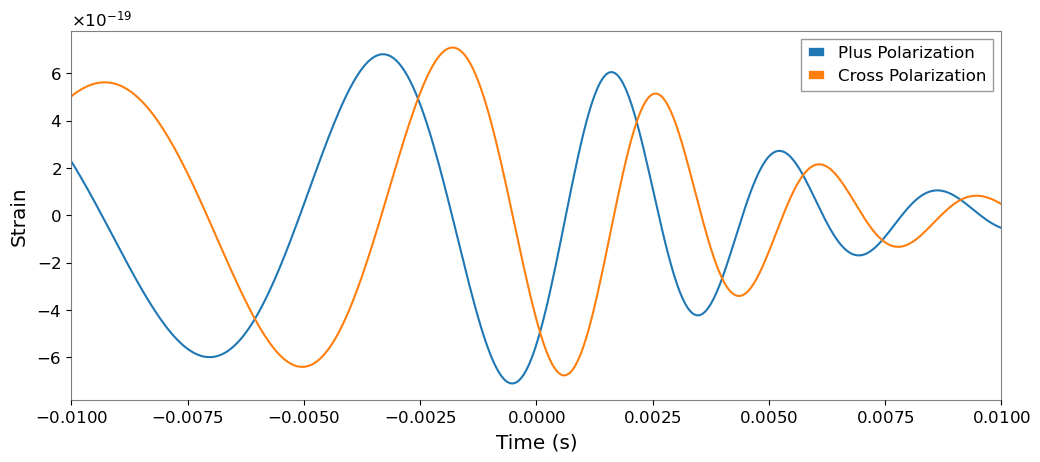

In [47]:
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=1.0/16384,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

In [48]:
from pycbc import frame
pycbc_strain =frame.read_frame('challenge2.gwf',"H1:CHALLENGE2")

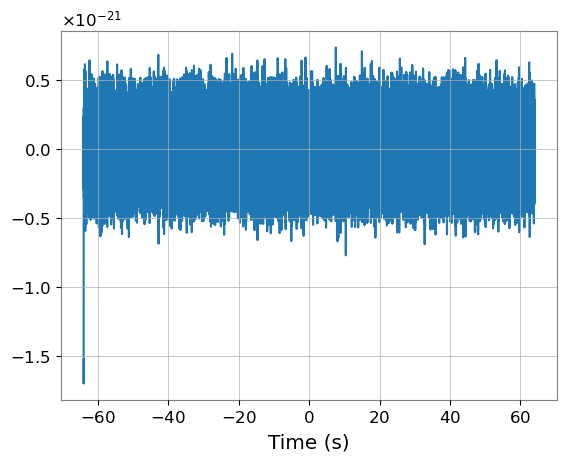

In [49]:
import pylab 
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass

strain = pycbc_strain

#to remove low frequesncy
strain= highpass(strain, 15.0)
strain= resample_to_delta_t(strain, 1.0/2048)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

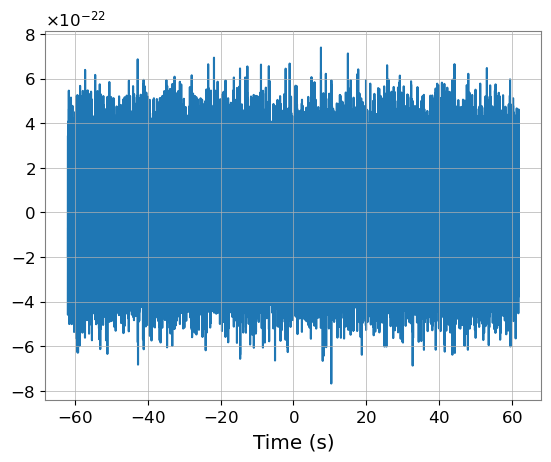

In [50]:
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [51]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
#estimate the power spectral density

#4 second sample of our time series in welch method.
psd = conditioned.psd(4)

psd = interpolate(psd, conditioned.delta_f)

psd = inverse_spectrum_truncation(psd, int(4*conditioned.sample_rate),
                                  low_frequency_cutoff=15)



In [53]:
from pycbc.waveform import get_td_waveform
#solar mass
m = 30 
hp,hc = get_td_waveform(approximant = "SEOBNRv4_opt",
                        mass1=m,
                        mass2=m,
                        delta_t=conditioned.delta_t,
                        f_lower=20)

hp.resize(len(conditioned)) 
#to change the size


Text(0, 0.5, 'Strain')

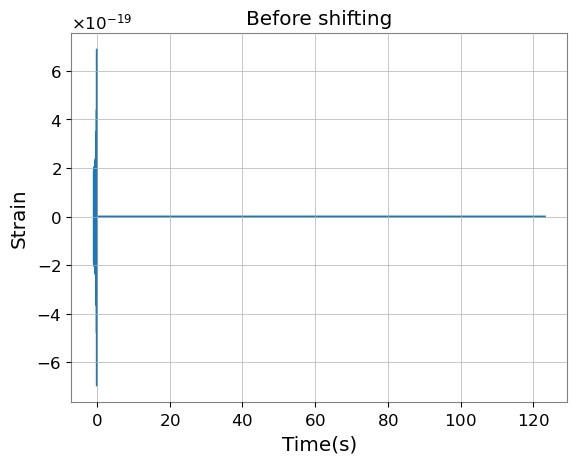

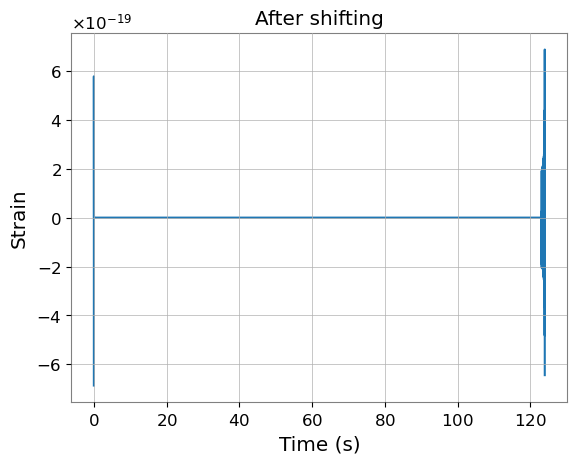

In [55]:
#signal plotting

pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time(s)')
pylab.ylabel('Strain')

template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

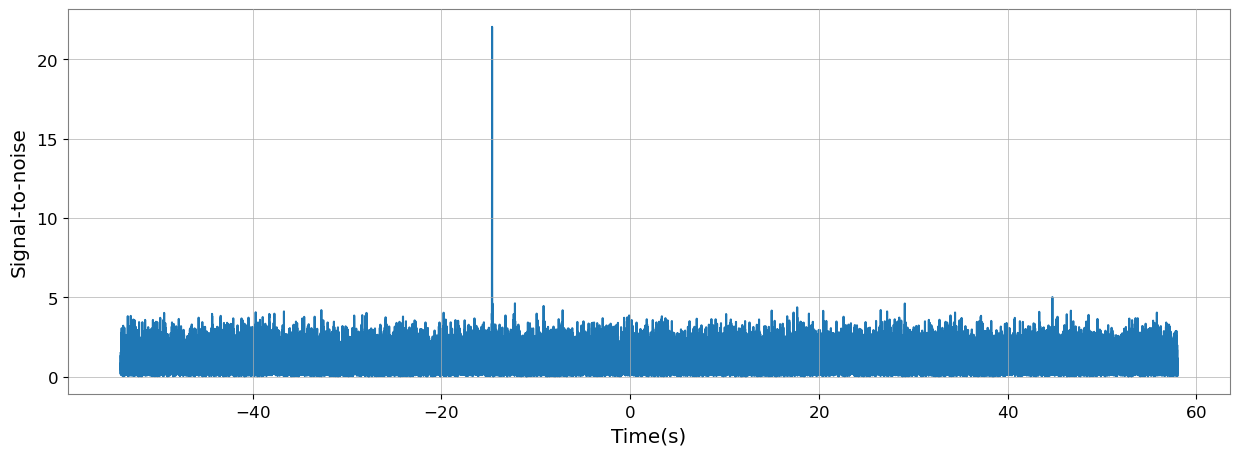

We found a signal at -14.6328125s with SNR 22.054545591712564


In [56]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)


snr=snr.crop(4+4,4)


pylab.figure(figsize=[15,5])
pylab.plot(snr.sample_times, abs(snr))
pylab.xlabel('Time(s)')
pylab.ylabel('Signal-to-noise')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp=snr[peak]
time=snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time,
                                                    abs(snrp)))